In [77]:
# IMPORTS
import requests
import json
from sportmonks.soccer import SoccerApiV2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import xlsxwriter
import excel2json
from datetime import datetime
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [115]:
ajax = pd.read_json("Sheet1.json")
# print(ajax)

X = ajax.drop('Injured', axis = 1)
Y = pd.factorize(ajax.Injured)[0].reshape(-1, 1)

enc = preprocessing.OneHotEncoder()

enc.fit(X)
onehotlabels_x = enc.transform(X).toarray()

column_names = enc.get_feature_names(['Name', 'Position', 'Minutes_played', 'Day_since_start', 'Total_minutes', 'Lineup_starts', 'Bench_starts', 'Venue'])

enc.fit(Y)
onehotlabels_y = enc.transform(Y).toarray()



In [79]:
X_train, X_test, y_train, y_test = train_test_split(onehotlabels_x, onehotlabels_y, test_size=0.2)
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [80]:
classifier = DecisionTreeClassifier(random_state=0, max_depth=None)
classifier.fit(X_train_val, y_train_val)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [81]:
# PREDICT VALIDATION
y_pred = classifier.predict(X_val)

In [82]:
# PRINT ACCURACY SCORE
print(accuracy_score(y_val, y_pred))

0.9901960784313726


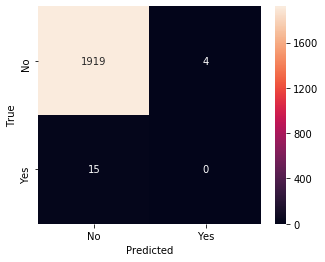

In [83]:
features = ajax['Injured'].unique()

y_val_non_category = [ np.argmax(t) for t in y_val ]
y_valpredict_non_category = [ np.argmax(t) for t in y_pred ]

confusion_val = pd.DataFrame(confusion_matrix(y_val_non_category, y_valpredict_non_category),columns=features,index=features)
plt.figure(figsize=(5,4))
sns.heatmap(confusion_val, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [84]:
# PREDICT TEST 
y_pred = classifier.predict(X_test)

In [85]:
# PRINT ACCURACY SCORE
print(accuracy_score(y_test, y_pred))

0.9913330581923235


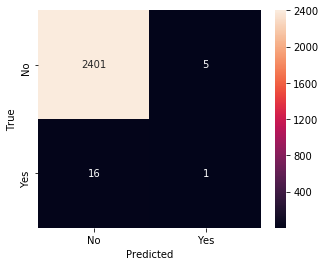

In [86]:
# PRINT CONFUSION MATRIX
features = ajax['Injured'].unique()

y_test_non_category = [ np.argmax(t) for t in y_test ]
y_predict_non_category = [ np.argmax(t) for t in y_pred ]

confusion_test = pd.DataFrame(confusion_matrix(y_test_non_category,y_predict_non_category),columns=features,index=features)
plt.figure(figsize=(5,4))
sns.heatmap(confusion_test,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [92]:
# ohe_df = pd.DataFrame(onehotlabels_x, columns=enc.get_feature_names(X.columns))



In [118]:
# feature_cols = ['Name', 'Position', 'Minutes_played', 'Day_since_start', 'Total_minutes', 'Lineup_starts', 'Bench_starts', 'Venue'] 

from pydotplus import graph_from_dot_data


dot_data = export_graphviz(classifier, out_file=None, 
                           feature_names=column_names,  
                           class_names=np.unique(Y).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# Draw graph
graph = graph_from_dot_data(dot_data)  

# Show graph
graph.write_png('bullshit.png')
Image(graph.create_png())

In [89]:
# feature_cols = ['Name', 'Position', 'Minutes_played', 'Day_since_start', 'Total_minutes', 'Lineup_starts', 'Bench_starts', 'Venue'] 

# dot_data = StringIO()
# export_graphviz(classifier, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True, feature_names = feature_cols, class_names=['No','Yes'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('predictions.png')
# Image(graph.create_png())